In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
class Perceptron(object):
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def output(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return np.where(self.output(X)>=0.0, 1, -1)
    
    def fit(self,X,y):
        self.w_ = np.random.normal(size = X.shape[1]+1)
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                pre = self.predict(xi)
                update = self.eta * (target - pre)
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update!=0.0)
            self.errors_.append(errors)
        return self

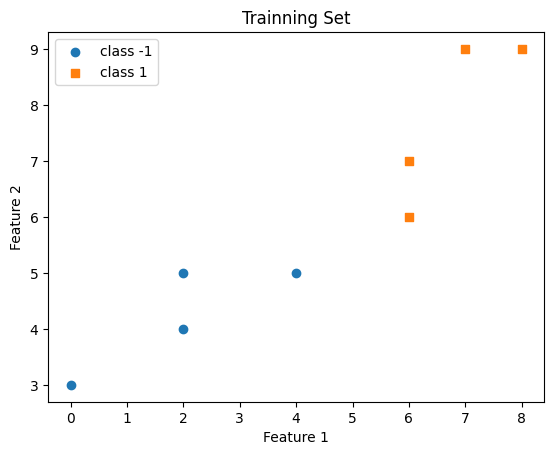

In [87]:
nhiphan = Perceptron()
df = pd.read_csv("./Datasets/iris.data", index_col=None, header=None)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']
df = df.iloc[50:150]
df['y'] = df['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)

X = df[['x2','x3']].values.astype(np.float32)
y = df['y'].values.astype(np.int32)

np.random.seed(123)
shuffle_idx = np.random.permutation(y.size)

X, y = X[shuffle_idx], y[shuffle_idx]
percent70 = int(len(shuffle_idx)*0.7)

X_train, X_test = X[:percent70], X[percent70:]
y_train, y_test = y[:percent70], y[percent70:]

mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu)/sigma
X_test = (X_test - mu)/sigma

plt.scatter(X_train[y_train==0, 0], X[y==0, 1], label='class 0', marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')
plt.title("Trainning Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [91]:
kq = nhiphan.fit(X,y)
print(kq.w_)

[-1.20087975  0.08416879  0.16529228]


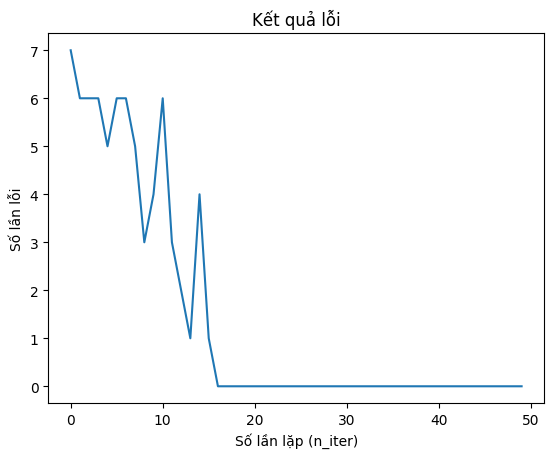

In [92]:
plt.plot(kq.errors_)
plt.title("Kết quả lỗi")
plt.ylabel("Số lần lỗi")
plt.xlabel("Số lần lặp (n_iter)")
plt.show()

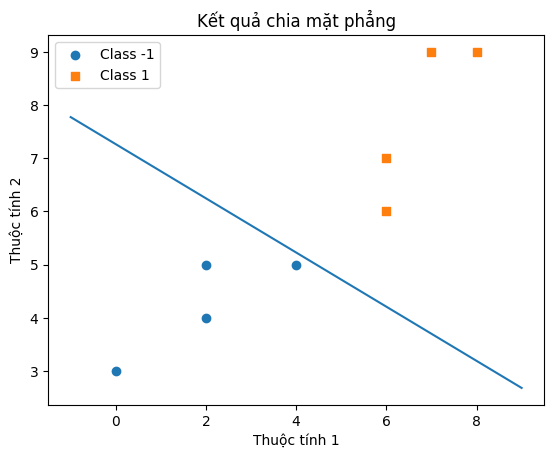

In [95]:
x_min = -1
y_min = (-(kq.w_[1] * x_min) - kq.w_[0]) / kq.w_[2]

x_max = 9
y_max = (-(kq.w_[1] * x_max) - kq.w_[0]) / kq.w_[2]

plt.plot([x_min, x_max], [y_min, y_max])
plt.scatter(X[y==-1, 0], X[y==-1, 1], label="Class -1", marker="o")
plt.scatter(X[y==1, 0], X[y==1, 1], label="Class 1", marker="s")
plt.title("Kết quả chia mặt phẳng")
plt.xlabel("Thuộc tính 1")
plt.ylabel("Thuộc tính 2")
plt.legend()
plt.show()